In [1]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
%pylab inline
import random

Populating the interactive namespace from numpy and matplotlib


In [2]:
# 参数
gamma = 0.6  # 折现率
rewardSize = -1
gridSize = 4
terminationStates = [[0,0],[gridSize-1,gridSize-1]]
actions = [[-1,0],[1,0],[0,1],[0,-1]]
numIterations = 10000

In [3]:
# 初始化
V = np.zeros((gridSize,gridSize))
returns = {(i,j):list() for i in range(gridSize) for j in range(gridSize)}
deltas = {(i,j):list() for i in range(gridSize) for j in range(gridSize)}
states = [[i,j] for i in range(gridSize) for j in range(gridSize)]

In [4]:
# utils
def generateEpisode():
    initState = random.choice(states[1:-1])
    episode = []
    while True:
        if list(initState) in terminationStates:
            return episode
        action = random.choice(actions)
        finalState = np.array(initState) + np.array(action)
        if -1 in list(finalState) or gridSize in list(finalState):
            finalState = initState
        episode.append([list(initState),action,rewardSize,list(finalState)])
        initState = finalState

In [7]:
for it in tqdm(range(numIterations)):
    episode = generateEpisode()
    G = 0
    for i,step in enumerate(episode[::-1]):
        G = gamma*G + step[2]
        if step[0] not in [x[0] for x in episode[::-1][len(episode)-i:]]:
            idx = (step[0][0],step[0][1])
            returns[idx].append(G)
            newValue = np.average(returns[idx])
            deltas[idx[0],idx[1]].append(np.abs(V[idx[0],idx[1]]-newValue))
            V[idx[0],idx[1]] = newValue

100%|███████████████████████████████████| 10000/10000 [00:12<00:00, 830.31it/s]


In [8]:
V

array([[ 0.        , -1.6482342 , -2.22092332, -2.38397491],
       [-1.64100253, -2.10277367, -2.27324728, -2.21191455],
       [-2.20578044, -2.27684593, -2.0913694 , -1.62357013],
       [-2.38190163, -2.22507834, -1.62382158,  0.        ]])

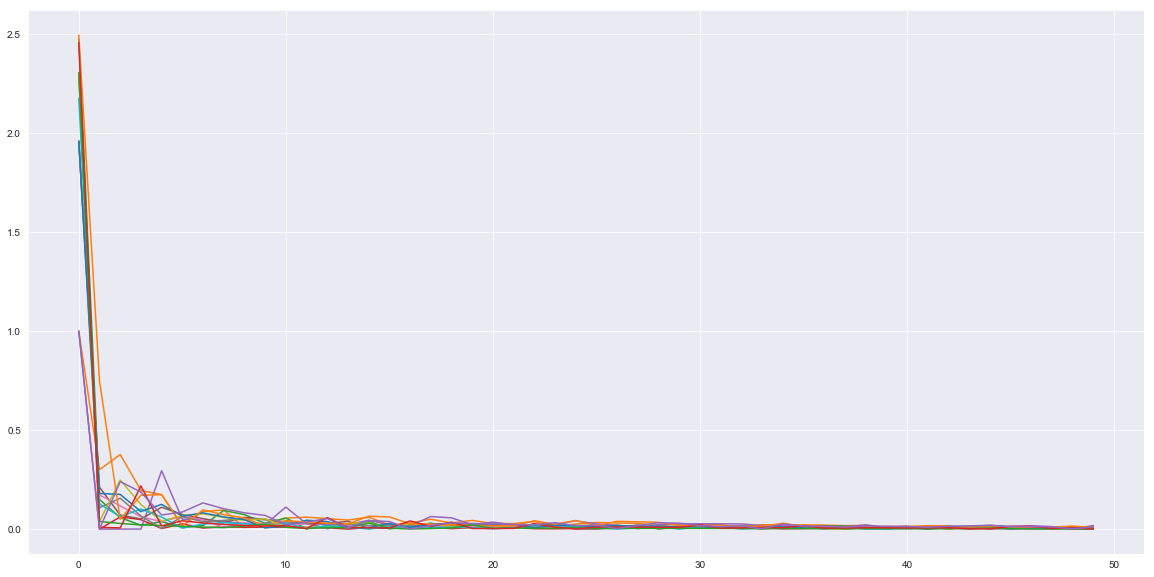

In [10]:
# using gamma = 1
plt.figure(figsize=(20,10))
all_series = [list(x)[:50] for x in deltas.values()]
for series in all_series:
    plt.plot(series)

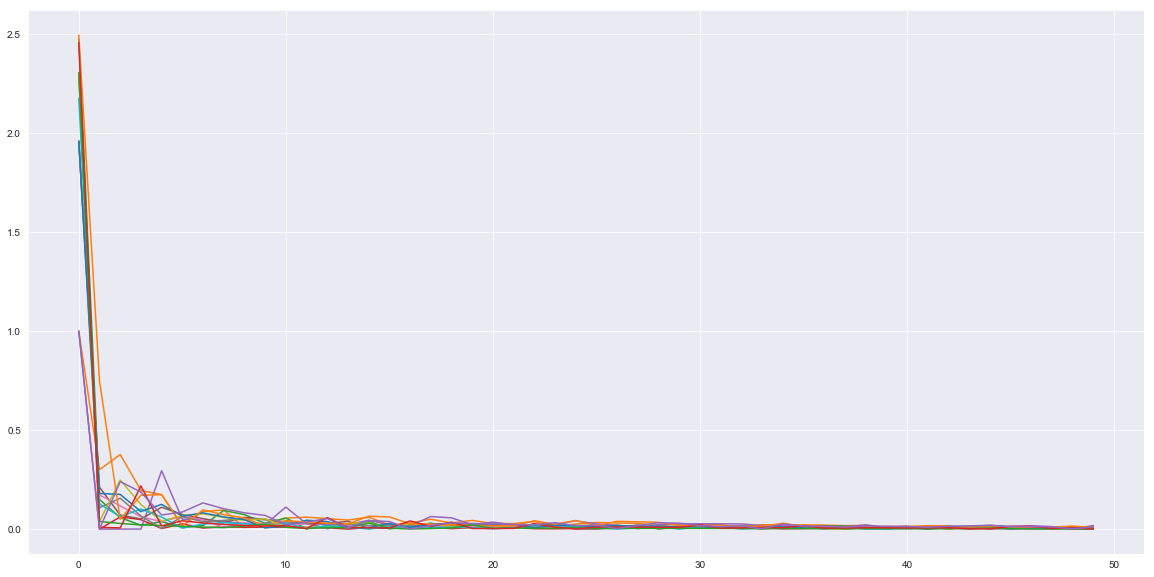

In [14]:
# using gamma = 0.6
plt.figure(figsize = (20,10))
all_series = [list(x)[:50] for x in deltas.values()]
for series in all_series:
    plt.plot(series)